# Random Forest Project

In [31]:
# This project explores publicly available data from 
# LendingClub.com. Lending Club connects people who need money (borrowers) 
# with people who have money (investors).

# This model will use lending data from 2007-2010 and try to classify 
# and predict whether or not the borrower paid back their loan in full. 

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [33]:
# Use pandas to read loan_data.csv as a dataframe called loans.
loans = pd.read_csv('loan_data.csv')

In [34]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [35]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [36]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


# Exploratory Data Analysis

Text(0, 0.5, 'COUNT')

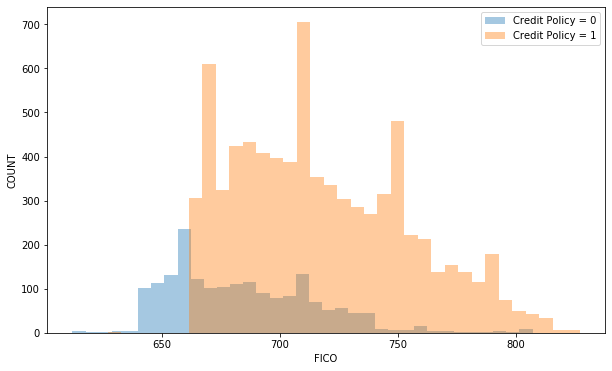

In [37]:
# Create a histogram of two FICO distributions on top of each other, 
# one for each credit.policy outcome.

plt.figure(figsize=(10,6))
sns.distplot(loans[loans['credit.policy']==0]['fico'],
             kde=False,
             label='Credit Policy = 0',
            bins=35)
sns.distplot(loans[loans['credit.policy']==1]['fico'],
             kde=False,
             label='Credit Policy = 1',
            bins=35)
plt.legend()
plt.xlabel('FICO')
plt.ylabel('COUNT')

Text(0, 0.5, 'COUNT')

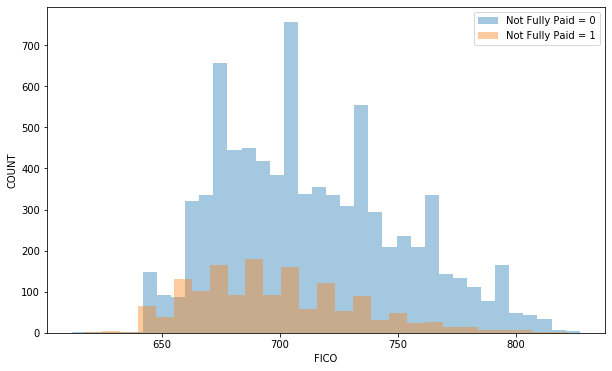

In [38]:
# Create a similar figure, except this time select by the 
# not.fully.paid column

plt.figure(figsize=(10,6))
sns.distplot(loans[loans['not.fully.paid']==0]['fico'],kde=False,label='Not Fully Paid = 0')
sns.distplot(loans[loans['not.fully.paid']==1]['fico'],kde=False,label='Not Fully Paid = 1')
plt.legend()
plt.xlabel('FICO')
plt.ylabel('COUNT')

Text(0.5, 32.09375, 'REASON FOR LOAN')

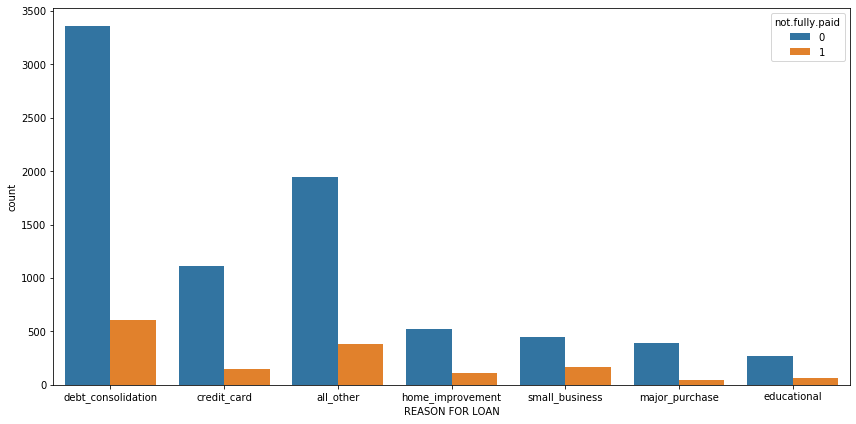

In [39]:
# Create a countplot using seaborn showing the counts of loans by purpose,
# with the color hue defined by not.fully.paid. 

plt.figure(figsize=(12,6))
sns.countplot(x=loans['purpose'],hue=loans['not.fully.paid'])
plt.tight_layout()
plt.xlabel('REASON FOR LOAN')

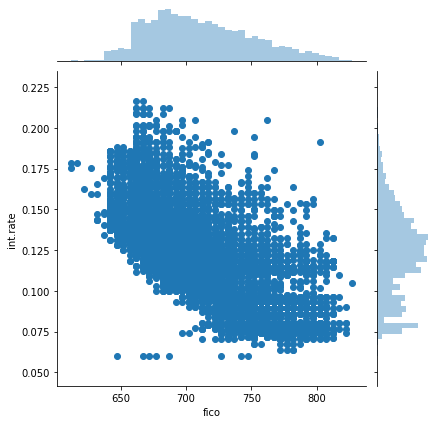

In [40]:
# Plot the trend between FICO score and interest rate.

sns.jointplot(x=loans['fico'],y=loans['int.rate'])

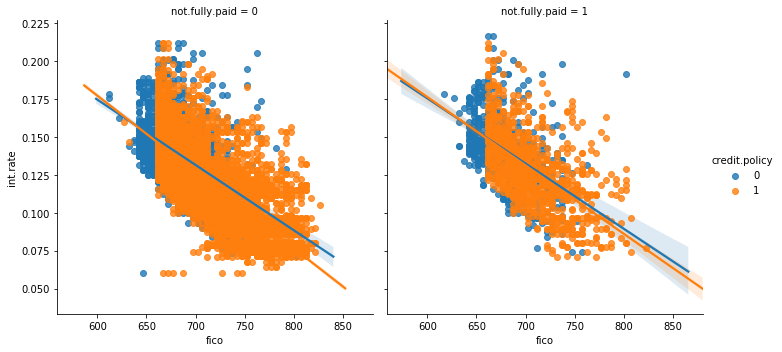

In [41]:
# Create lmplots to see if the trend differed between 
# not.fully.paid and credit.policy. 

sns.lmplot(data=loans,
           x='fico',
           y='int.rate',
           hue='credit.policy',
           col='not.fully.paid')

# Data Preparation

In [42]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


## Categorical Features

In [43]:
# Purpose column is categorical

# That means we need to transform them using dummy variables 
# so sklearn will be able to understand them. This can be done in one 
# clean step using pd.get_dummies.

cat_feats=['purpose']

In [44]:
# Use pd.get_dummies(loans,columns=cat_feats,drop_first=True) to create 
# a fixed larger dataframe that has new feature columns with dummy 
# variables. Set this dataframe as final_data.

final_data = pd.get_dummies(data=loans,columns=cat_feats,drop_first=True)

In [45]:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


## Train Test Split

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training a Decision Tree Model

In [48]:
# Train a single decision tree first

# Import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [49]:
# Create an instance of DecisionTreeClassifier() called dtree and 
# fit it to the training data.

dtree = DecisionTreeClassifier()

In [50]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

## Predictions and Evaluation of Decision Tree

In [51]:
# Create predictions from the test set
predictions = dtree.predict(X_test)

In [52]:
from sklearn.metrics import classification_report,confusion_matrix

In [53]:
# Create a classification report and a confusion matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[1983  448]
 [ 338  105]]
              precision    recall  f1-score   support

           0       0.85      0.82      0.83      2431
           1       0.19      0.24      0.21       443

    accuracy                           0.73      2874
   macro avg       0.52      0.53      0.52      2874
weighted avg       0.75      0.73      0.74      2874



## Training the Random Forest model

In [54]:
# Create an instance of the RandomForestClassifier class and 
# fit it to our training data from the previous step.

from sklearn.ensemble import RandomForestClassifier

In [55]:
rfc = RandomForestClassifier(n_estimators=300)

In [56]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Predictions and Evaluation

In [57]:
# Predict the class of not.fully.paid for the X_test data.

rfc_pred = rfc.predict(X_test)

In [58]:
# Create a classification report from the results.

print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.53      0.02      0.04       443

    accuracy                           0.85      2874
   macro avg       0.69      0.51      0.48      2874
weighted avg       0.80      0.85      0.78      2874



In [59]:
# Show the Confusion Matrix for the predictions.

print(confusion_matrix(y_test,rfc_pred))

[[2423    8]
 [ 434    9]]


In [60]:
# We can see that the Random Forest Model has improved accuracy
# to that of the Single Tree